In [1]:
from train_utils import *
import torch
from torch.utils.data import DataLoader
from dataset.dataset_loader import SNDataset, myNormalize, myToTensor, Augmentations
from torchvision import transforms

In [2]:
import os
os.getcwd()

NAFISEH = "Nafiseh"
MOIEN = "Moien"

if "d:" in os.getcwd():
    USER = MOIEN
elif "c:" in os.getcwd():
    USER = NAFISEH
else:
    raise Exception("Unknown user")

USER

'Nafiseh'

In [3]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
#mynorm = myNormalize(img_bands_min_max =[[(0,7),(0,1)], [(7,12),(-1,1)], [(12), (-4,2963)], [(13), (0, 90)]], oc_min = 0, oc_max = 200)
mynorm = myNormalize(img_bands_min_max =[[(0,7),(0,1)], [(7,12),(-1,1)]], oc_min = 0, oc_max = 90)
my_to_tensor = myToTensor()
my_augmentation = Augmentations()
train_transform = transforms.Compose([mynorm, my_to_tensor,my_augmentation])
test_transform = transforms.Compose([mynorm, my_to_tensor])

In [5]:
bands = [0,1,2,3,4,5,6,7,8,9,10,11]
if USER == MOIEN:
    train_ds = SNDataset('D:\python\SoilNet\dataset\l8_images\\train\\','D:\python\SoilNet\dataset\LUCAS_2015_all.csv',l8_bands=bands, transform=train_transform)
elif USER == NAFISEH:
    train_ds = SNDataset('C:\\Users\\nkakhani\\_Multimodal\\SoilNet-1\\dataset\\l8_images\\train',\
                        'C:\\Users\\nkakhani\\_Multimodal\\SoilNet-1\\dataset\\LUCAS_2015_all.csv',l8_bands=bands, transform=train_transform) #Nafiseh 
if USER == MOIEN:
    test_ds = SNDataset('D:\python\SoilNet\dataset\l8_images\\test\\','D:\python\SoilNet\dataset\LUCAS_2015_all.csv',l8_bands=bands, transform=test_transform)
elif USER == NAFISEH:
    test_ds = SNDataset('C:\\Users\\nkakhani\\_Multimodal\\SoilNet-1\\dataset\\l8_images\\test',\
                        'C:\\Users\\nkakhani\\_Multimodal\\SoilNet-1\\dataset\\LUCAS_2015_all.csv',l8_bands=bands, transform=test_transform) #Nafiseh 

In [6]:
# CONFIG
NUM_WORKERS = 6 if USER == NAFISEH else 2
TRAIN_BATCH_SIZE = 32 if USER == NAFISEH else 4
TEST_BATCH_SIZE = 32 if USER == NAFISEH else 4
LEARNING_RATE = 1e-4 if USER == NAFISEH else 1e-4
NUM_EPOCHS = 100 if USER == NAFISEH else 10
LR_SCHEDULER = "step" # step, plateau or None
USE_SPATIAL_ATTENTION = False

In [7]:
train_dl = DataLoader(train_ds, batch_size=TRAIN_BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_dl = DataLoader(test_ds, batch_size=TEST_BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [8]:
from soilnet.soil_net import SoilNetFC, ResNet

In [9]:
#model = SoilNetFC(cnn_in_channels=12, regresor_input_from_cnn=1024, hidden_size=128).to(device)
if USE_SPATIAL_ATTENTION:
    model = ResNet(resnet_architecture="101+GLAM",cnn_in_channels=12, regresor_input_from_cnn=1024, hidden_size=128).to(device)
else:
    model = ResNet(resnet_architecture="101",cnn_in_channels=12, regresor_input_from_cnn=1024, hidden_size=128).to(device)

In [10]:
# # Get image and label from custom DataLoader
# img_custom, label_custom = next(iter(train_dl))
# print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
# print(f"Label shape: {label_custom.shape}")
# img_gpu = img_custom.to(device)
# print(img_gpu.device, img_gpu.shape)
# print(img_gpu.shape)
# y = model(img_gpu)
# y.detach()

In [11]:
results = train(model, train_dl, test_dl, torch.optim.Adam(model.parameters(), lr=LEARNING_RATE), RMSELoss(), epochs=NUM_EPOCHS, lr_scheduler=LR_SCHEDULER)

Adjusting learning rate of group 0 to 1.0000e-04.
 Epoch 1
------------------------------- 


100%|██████████| 478/478 [00:42<00:00, 11.25it/s, Train_Loss=0.263]


 Epoch 1 Results: |  train_loss: 0.26349242570884057 |  test_loss: 0.2484048628350244  

Adjusting learning rate of group 0 to 1.0000e-04.
 Epoch 2
------------------------------- 


100%|██████████| 478/478 [00:38<00:00, 12.54it/s, Train_Loss=0.25] 


 Epoch 2 Results: |  train_loss: 0.24970765449262564 |  test_loss: 0.24577721246402628  

Adjusting learning rate of group 0 to 1.0000e-04.
 Epoch 3
------------------------------- 


100%|██████████| 478/478 [00:38<00:00, 12.52it/s, Train_Loss=0.247]


 Epoch 3 Results: |  train_loss: 0.24681403484803363 |  test_loss: 0.23871180665318983  

Adjusting learning rate of group 0 to 1.0000e-04.
 Epoch 4
------------------------------- 


100%|██████████| 478/478 [00:38<00:00, 12.54it/s, Train_Loss=0.244]


 Epoch 4 Results: |  train_loss: 0.24385769609128083 |  test_loss: 0.23705755500462802  

Adjusting learning rate of group 0 to 1.0000e-04.
 Epoch 5
------------------------------- 


100%|██████████| 478/478 [00:38<00:00, 12.53it/s, Train_Loss=0.242]


 Epoch 5 Results: |  train_loss: 0.24183535564955808 |  test_loss: 0.2570382528496485  

Adjusting learning rate of group 0 to 1.0000e-04.
 Epoch 6
------------------------------- 


100%|██████████| 478/478 [00:39<00:00, 12.11it/s, Train_Loss=0.241]


 Epoch 6 Results: |  train_loss: 0.24062992167896805 |  test_loss: 0.23388618829041502  

Adjusting learning rate of group 0 to 1.0000e-04.
 Epoch 7
------------------------------- 


100%|██████████| 478/478 [00:39<00:00, 12.13it/s, Train_Loss=0.239]


 Epoch 7 Results: |  train_loss: 0.23903505281237378 |  test_loss: 0.2334267764630979  

Adjusting learning rate of group 0 to 1.0000e-04.
 Epoch 8
------------------------------- 


100%|██████████| 478/478 [00:39<00:00, 12.21it/s, Train_Loss=0.238]


 Epoch 8 Results: |  train_loss: 0.23754972437685004 |  test_loss: 0.23291392526487364  

Adjusting learning rate of group 0 to 1.0000e-04.
 Epoch 9
------------------------------- 


100%|██████████| 478/478 [00:39<00:00, 12.22it/s, Train_Loss=0.238]


 Epoch 9 Results: |  train_loss: 0.2381446330056031 |  test_loss: 0.23471224960619516  

Adjusting learning rate of group 0 to 1.0000e-04.
 Epoch 10
------------------------------- 


100%|██████████| 478/478 [00:38<00:00, 12.28it/s, Train_Loss=0.238]


 Epoch 10 Results: |  train_loss: 0.23771930040175945 |  test_loss: 0.26017603267283335  

Adjusting learning rate of group 0 to 2.0000e-05.
 Epoch 11
------------------------------- 


100%|██████████| 478/478 [00:38<00:00, 12.55it/s, Train_Loss=0.233]


 Epoch 11 Results: |  train_loss: 0.23312573802022254 |  test_loss: 0.22811008957180665  

Adjusting learning rate of group 0 to 2.0000e-05.
 Epoch 12
------------------------------- 


100%|██████████| 478/478 [00:38<00:00, 12.55it/s, Train_Loss=0.232]


 Epoch 12 Results: |  train_loss: 0.2324750258832796 |  test_loss: 0.227973615329196  

Adjusting learning rate of group 0 to 2.0000e-05.
 Epoch 13
------------------------------- 


100%|██████████| 478/478 [00:38<00:00, 12.50it/s, Train_Loss=0.232]


 Epoch 13 Results: |  train_loss: 0.2316870119843523 |  test_loss: 0.2287582788262924  

Adjusting learning rate of group 0 to 2.0000e-05.
 Epoch 14
------------------------------- 


100%|██████████| 478/478 [00:38<00:00, 12.55it/s, Train_Loss=0.231]


 Epoch 14 Results: |  train_loss: 0.23125532889839995 |  test_loss: 0.2303602941279864  

Adjusting learning rate of group 0 to 2.0000e-05.
 Epoch 15
------------------------------- 


100%|██████████| 478/478 [00:37<00:00, 12.60it/s, Train_Loss=0.23] 


 Epoch 15 Results: |  train_loss: 0.230375934127235 |  test_loss: 0.2266167346252142  

Adjusting learning rate of group 0 to 2.0000e-05.
 Epoch 16
------------------------------- 


100%|██████████| 478/478 [01:12<00:00,  6.59it/s, Train_Loss=0.229]


 Epoch 16 Results: |  train_loss: 0.229250739963733 |  test_loss: 0.22998881590192335  

Adjusting learning rate of group 0 to 2.0000e-05.
 Epoch 17
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.08it/s, Train_Loss=0.229]


 Epoch 17 Results: |  train_loss: 0.22913380023325836 |  test_loss: 0.22885684587442093  

Adjusting learning rate of group 0 to 2.0000e-05.
 Epoch 18
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.08it/s, Train_Loss=0.229]


 Epoch 18 Results: |  train_loss: 0.2285784603910965 |  test_loss: 0.22936447628223114  

Adjusting learning rate of group 0 to 2.0000e-05.
 Epoch 19
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  5.98it/s, Train_Loss=0.229]


 Epoch 19 Results: |  train_loss: 0.22857208997322925 |  test_loss: 0.23494398496011748  

Adjusting learning rate of group 0 to 2.0000e-05.
 Epoch 20
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.11it/s, Train_Loss=0.228]


 Epoch 20 Results: |  train_loss: 0.22809685012286676 |  test_loss: 0.22812887520468147  

Adjusting learning rate of group 0 to 4.0000e-06.
 Epoch 21
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.08it/s, Train_Loss=0.225]


 Epoch 21 Results: |  train_loss: 0.22518987314596337 |  test_loss: 0.22513120170057255  

Adjusting learning rate of group 0 to 4.0000e-06.
 Epoch 22
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.06it/s, Train_Loss=0.225]


 Epoch 22 Results: |  train_loss: 0.22511905160533832 |  test_loss: 0.22591188044226082  

Adjusting learning rate of group 0 to 4.0000e-06.
 Epoch 23
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.08it/s, Train_Loss=0.224]


 Epoch 23 Results: |  train_loss: 0.2243922398928319 |  test_loss: 0.22679019458320018  

Adjusting learning rate of group 0 to 4.0000e-06.
 Epoch 24
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.06it/s, Train_Loss=0.224]


 Epoch 24 Results: |  train_loss: 0.22437413582367877 |  test_loss: 0.2266146044117691  

Adjusting learning rate of group 0 to 4.0000e-06.
 Epoch 25
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.06it/s, Train_Loss=0.224]


 Epoch 25 Results: |  train_loss: 0.22411892360473776 |  test_loss: 0.22604433963768675  

Adjusting learning rate of group 0 to 4.0000e-06.
 Epoch 26
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.08it/s, Train_Loss=0.224]


 Epoch 26 Results: |  train_loss: 0.223954468155007 |  test_loss: 0.2265140277734638  

Adjusting learning rate of group 0 to 4.0000e-06.
 Epoch 27
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.02it/s, Train_Loss=0.224]


 Epoch 27 Results: |  train_loss: 0.22390946736520304 |  test_loss: 0.22636977240551998  

Adjusting learning rate of group 0 to 4.0000e-06.
 Epoch 28
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.07it/s, Train_Loss=0.223]


 Epoch 28 Results: |  train_loss: 0.22306702984302113 |  test_loss: 0.22645269443083854  

Adjusting learning rate of group 0 to 4.0000e-06.
 Epoch 29
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.06it/s, Train_Loss=0.223]


 Epoch 29 Results: |  train_loss: 0.2227049707181783 |  test_loss: 0.22621464625979862  

Adjusting learning rate of group 0 to 4.0000e-06.
 Epoch 30
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.07it/s, Train_Loss=0.223]


 Epoch 30 Results: |  train_loss: 0.22269553048964824 |  test_loss: 0.22543150077771096  

Adjusting learning rate of group 0 to 8.0000e-07.
 Epoch 31
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.07it/s, Train_Loss=0.223]


 Epoch 31 Results: |  train_loss: 0.22330741606122778 |  test_loss: 0.2262161388775728  

Adjusting learning rate of group 0 to 8.0000e-07.
 Epoch 32
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.05it/s, Train_Loss=0.223]


 Epoch 32 Results: |  train_loss: 0.22252457966116182 |  test_loss: 0.22575848941167775  

Adjusting learning rate of group 0 to 8.0000e-07.
 Epoch 33
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.08it/s, Train_Loss=0.222]


 Epoch 33 Results: |  train_loss: 0.2224766123244952 |  test_loss: 0.22580191607240344  

Adjusting learning rate of group 0 to 8.0000e-07.
 Epoch 34
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.10it/s, Train_Loss=0.222]


 Epoch 34 Results: |  train_loss: 0.22231594175412067 |  test_loss: 0.2266581608322415  

Adjusting learning rate of group 0 to 8.0000e-07.
 Epoch 35
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.03it/s, Train_Loss=0.222]


 Epoch 35 Results: |  train_loss: 0.221709897578012 |  test_loss: 0.22646989526539824  

Adjusting learning rate of group 0 to 8.0000e-07.
 Epoch 36
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.08it/s, Train_Loss=0.222]


 Epoch 36 Results: |  train_loss: 0.22194118303671542 |  test_loss: 0.22649293507102633  

Adjusting learning rate of group 0 to 8.0000e-07.
 Epoch 37
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.05it/s, Train_Loss=0.221]


 Epoch 37 Results: |  train_loss: 0.2213189850666533 |  test_loss: 0.2258722127897896  

Adjusting learning rate of group 0 to 8.0000e-07.
 Epoch 38
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.05it/s, Train_Loss=0.223]


 Epoch 38 Results: |  train_loss: 0.2228370367794855 |  test_loss: 0.22600417692948432  

Adjusting learning rate of group 0 to 8.0000e-07.
 Epoch 39
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.06it/s, Train_Loss=0.223]


 Epoch 39 Results: |  train_loss: 0.2226736814438299 |  test_loss: 0.2259029406156853  

Adjusting learning rate of group 0 to 8.0000e-07.
 Epoch 40
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.04it/s, Train_Loss=0.221]


 Epoch 40 Results: |  train_loss: 0.22143281301070455 |  test_loss: 0.225601390819915  

Adjusting learning rate of group 0 to 1.6000e-07.
 Epoch 41
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.07it/s, Train_Loss=0.223]


 Epoch 41 Results: |  train_loss: 0.22250127811062784 |  test_loss: 0.2255454949327629  

Adjusting learning rate of group 0 to 1.6000e-07.
 Epoch 42
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.08it/s, Train_Loss=0.222]


 Epoch 42 Results: |  train_loss: 0.2223397670742358 |  test_loss: 0.22594844239906672  

Adjusting learning rate of group 0 to 1.6000e-07.
 Epoch 43
------------------------------- 


100%|██████████| 478/478 [01:20<00:00,  5.97it/s, Train_Loss=0.223]


 Epoch 43 Results: |  train_loss: 0.22252347273557255 |  test_loss: 0.2270500222153037  

Adjusting learning rate of group 0 to 1.6000e-07.
 Epoch 44
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.08it/s, Train_Loss=0.222]


 Epoch 44 Results: |  train_loss: 0.22204735045901902 |  test_loss: 0.22615964879302214  

Adjusting learning rate of group 0 to 1.6000e-07.
 Epoch 45
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.01it/s, Train_Loss=0.222]


 Epoch 45 Results: |  train_loss: 0.22234674281280908 |  test_loss: 0.2252660500307153  

Adjusting learning rate of group 0 to 1.6000e-07.
 Epoch 46
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.06it/s, Train_Loss=0.222]


 Epoch 46 Results: |  train_loss: 0.22183740017429057 |  test_loss: 0.22604607654749043  

Adjusting learning rate of group 0 to 1.6000e-07.
 Epoch 47
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.05it/s, Train_Loss=0.223]


 Epoch 47 Results: |  train_loss: 0.22250710873548954 |  test_loss: 0.2260945334921788  

Adjusting learning rate of group 0 to 1.6000e-07.
 Epoch 48
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.01it/s, Train_Loss=0.222]


 Epoch 48 Results: |  train_loss: 0.22224397318258446 |  test_loss: 0.22583359626740435  

Adjusting learning rate of group 0 to 1.6000e-07.
 Epoch 49
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.09it/s, Train_Loss=0.221]


 Epoch 49 Results: |  train_loss: 0.22139146693331427 |  test_loss: 0.22556984593180845  

Adjusting learning rate of group 0 to 1.6000e-07.
 Epoch 50
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.05it/s, Train_Loss=0.222]


 Epoch 50 Results: |  train_loss: 0.22199154691965511 |  test_loss: 0.2254704085797289  

Adjusting learning rate of group 0 to 3.2000e-08.
 Epoch 51
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.04it/s, Train_Loss=0.221]


 Epoch 51 Results: |  train_loss: 0.22114413337602776 |  test_loss: 0.225636753722699  

Adjusting learning rate of group 0 to 3.2000e-08.
 Epoch 52
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.02it/s, Train_Loss=0.223]


 Epoch 52 Results: |  train_loss: 0.22260698919266336 |  test_loss: 0.2258981606059701  

Adjusting learning rate of group 0 to 3.2000e-08.
 Epoch 53
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.03it/s, Train_Loss=0.222]


 Epoch 53 Results: |  train_loss: 0.22238509221368755 |  test_loss: 0.2259022263932402  

Adjusting learning rate of group 0 to 3.2000e-08.
 Epoch 54
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.06it/s, Train_Loss=0.222]


 Epoch 54 Results: |  train_loss: 0.2222617051903174 |  test_loss: 0.2256292909057471  

Adjusting learning rate of group 0 to 3.2000e-08.
 Epoch 55
------------------------------- 


100%|██████████| 478/478 [01:20<00:00,  5.94it/s, Train_Loss=0.222]


 Epoch 55 Results: |  train_loss: 0.2221528060703098 |  test_loss: 0.22641724424205556  

Adjusting learning rate of group 0 to 3.2000e-08.
 Epoch 56
------------------------------- 


100%|██████████| 478/478 [01:21<00:00,  5.88it/s, Train_Loss=0.222]


 Epoch 56 Results: |  train_loss: 0.2219259949969946 |  test_loss: 0.22619342401514958  

Adjusting learning rate of group 0 to 3.2000e-08.
 Epoch 57
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.02it/s, Train_Loss=0.222]


 Epoch 57 Results: |  train_loss: 0.22220484557012135 |  test_loss: 0.225936155412754  

Adjusting learning rate of group 0 to 3.2000e-08.
 Epoch 58
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.02it/s, Train_Loss=0.222]


 Epoch 58 Results: |  train_loss: 0.22241098913812238 |  test_loss: 0.22643135961172353  

Adjusting learning rate of group 0 to 3.2000e-08.
 Epoch 59
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.02it/s, Train_Loss=0.222]


 Epoch 59 Results: |  train_loss: 0.22173266948267006 |  test_loss: 0.22500360539577302  

Adjusting learning rate of group 0 to 3.2000e-08.
 Epoch 60
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.02it/s, Train_Loss=0.222]


 Epoch 60 Results: |  train_loss: 0.22189130942691818 |  test_loss: 0.22546369462770266  

Adjusting learning rate of group 0 to 6.4000e-09.
 Epoch 61
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.00it/s, Train_Loss=0.222]


 Epoch 61 Results: |  train_loss: 0.22241222019848964 |  test_loss: 0.22540127980883104  

Adjusting learning rate of group 0 to 6.4000e-09.
 Epoch 62
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.04it/s, Train_Loss=0.222]


 Epoch 62 Results: |  train_loss: 0.2223154741288728 |  test_loss: 0.22604978769800088  

Adjusting learning rate of group 0 to 6.4000e-09.
 Epoch 63
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.05it/s, Train_Loss=0.222]


 Epoch 63 Results: |  train_loss: 0.2217353716430305 |  test_loss: 0.2258841033182005  

Adjusting learning rate of group 0 to 6.4000e-09.
 Epoch 64
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  5.99it/s, Train_Loss=0.222]


 Epoch 64 Results: |  train_loss: 0.2218965267037747 |  test_loss: 0.22624287830434575  

Adjusting learning rate of group 0 to 6.4000e-09.
 Epoch 65
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  5.98it/s, Train_Loss=0.222]


 Epoch 65 Results: |  train_loss: 0.22196932476808837 |  test_loss: 0.2273786911455384  

Adjusting learning rate of group 0 to 6.4000e-09.
 Epoch 66
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.02it/s, Train_Loss=0.223]


 Epoch 66 Results: |  train_loss: 0.2233340823438377 |  test_loss: 0.22600117902251055  

Adjusting learning rate of group 0 to 6.4000e-09.
 Epoch 67
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.02it/s, Train_Loss=0.222]


 Epoch 67 Results: |  train_loss: 0.22157996002912023 |  test_loss: 0.22585244134177257  

Adjusting learning rate of group 0 to 6.4000e-09.
 Epoch 68
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.04it/s, Train_Loss=0.222]


 Epoch 68 Results: |  train_loss: 0.22218374845622474 |  test_loss: 0.22625860060653546  

Adjusting learning rate of group 0 to 6.4000e-09.
 Epoch 69
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  5.99it/s, Train_Loss=0.222]


 Epoch 69 Results: |  train_loss: 0.22244514596636825 |  test_loss: 0.2257242395277441  

Adjusting learning rate of group 0 to 6.4000e-09.
 Epoch 70
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.02it/s, Train_Loss=0.222]


 Epoch 70 Results: |  train_loss: 0.2215288507140331 |  test_loss: 0.22589248048998142  

Adjusting learning rate of group 0 to 1.2800e-09.
 Epoch 71
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.05it/s, Train_Loss=0.222]


 Epoch 71 Results: |  train_loss: 0.2218184538777902 |  test_loss: 0.22603998425668173  

Adjusting learning rate of group 0 to 1.2800e-09.
 Epoch 72
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.00it/s, Train_Loss=0.222]


 Epoch 72 Results: |  train_loss: 0.22207542571188515 |  test_loss: 0.2257358326311529  

Adjusting learning rate of group 0 to 1.2800e-09.
 Epoch 73
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  5.98it/s, Train_Loss=0.222]


 Epoch 73 Results: |  train_loss: 0.22185532196919788 |  test_loss: 0.2258184409707132  

Adjusting learning rate of group 0 to 1.2800e-09.
 Epoch 74
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.01it/s, Train_Loss=0.222]


 Epoch 74 Results: |  train_loss: 0.2217998613435853 |  test_loss: 0.22541247759639782  

Adjusting learning rate of group 0 to 1.2800e-09.
 Epoch 75
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.03it/s, Train_Loss=0.222]


 Epoch 75 Results: |  train_loss: 0.22248544799608166 |  test_loss: 0.22571589504062695  

Adjusting learning rate of group 0 to 1.2800e-09.
 Epoch 76
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.02it/s, Train_Loss=0.223]


 Epoch 76 Results: |  train_loss: 0.22296682860561992 |  test_loss: 0.22563407586438813  

Adjusting learning rate of group 0 to 1.2800e-09.
 Epoch 77
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  5.98it/s, Train_Loss=0.222]


 Epoch 77 Results: |  train_loss: 0.2222292561193141 |  test_loss: 0.2266746416796733  

Adjusting learning rate of group 0 to 1.2800e-09.
 Epoch 78
------------------------------- 


100%|██████████| 478/478 [01:20<00:00,  5.95it/s, Train_Loss=0.222]


 Epoch 78 Results: |  train_loss: 0.22227660416933284 |  test_loss: 0.22584932020110807  

Adjusting learning rate of group 0 to 1.2800e-09.
 Epoch 79
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  6.03it/s, Train_Loss=0.222]


 Epoch 79 Results: |  train_loss: 0.22157173293592042 |  test_loss: 0.22631841326934576  

Adjusting learning rate of group 0 to 1.2800e-09.
 Epoch 80
------------------------------- 


100%|██████████| 478/478 [01:20<00:00,  5.95it/s, Train_Loss=0.222]


 Epoch 80 Results: |  train_loss: 0.22151172697294705 |  test_loss: 0.22561309024365278  

Adjusting learning rate of group 0 to 2.5600e-10.
 Epoch 81
------------------------------- 


100%|██████████| 478/478 [01:19<00:00,  5.98it/s, Train_Loss=0.222]


 Epoch 81 Results: |  train_loss: 0.22242951884117584 |  test_loss: 0.2257438057313  

Adjusting learning rate of group 0 to 2.5600e-10.
 Epoch 82
------------------------------- 


100%|██████████| 478/478 [01:22<00:00,  5.82it/s, Train_Loss=0.223]


 Epoch 82 Results: |  train_loss: 0.2229509508572363 |  test_loss: 0.22611086277196007  

Adjusting learning rate of group 0 to 2.5600e-10.
 Epoch 83
------------------------------- 


100%|██████████| 478/478 [01:20<00:00,  5.90it/s, Train_Loss=0.222]


 Epoch 83 Results: |  train_loss: 0.22179974038855302 |  test_loss: 0.22554859383045323  

Adjusting learning rate of group 0 to 2.5600e-10.
 Epoch 84
------------------------------- 


100%|██████████| 478/478 [01:21<00:00,  5.87it/s, Train_Loss=0.223]


 Epoch 84 Results: |  train_loss: 0.22289620408453203 |  test_loss: 0.22552303273747437  

Adjusting learning rate of group 0 to 2.5600e-10.
 Epoch 85
------------------------------- 


100%|██████████| 478/478 [01:21<00:00,  5.87it/s, Train_Loss=0.221]


 Epoch 85 Results: |  train_loss: 0.22081112347262674 |  test_loss: 0.22573517866595819  

Adjusting learning rate of group 0 to 2.5600e-10.
 Epoch 86
------------------------------- 


100%|██████████| 478/478 [01:21<00:00,  5.86it/s, Train_Loss=0.222]


 Epoch 86 Results: |  train_loss: 0.2219788778152426 |  test_loss: 0.2256038172075348  

Adjusting learning rate of group 0 to 2.5600e-10.
 Epoch 87
------------------------------- 


100%|██████████| 478/478 [01:15<00:00,  6.32it/s, Train_Loss=0.222]


 Epoch 87 Results: |  train_loss: 0.22157036977582398 |  test_loss: 0.22549599795228373  

Adjusting learning rate of group 0 to 2.5600e-10.
 Epoch 88
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.05it/s, Train_Loss=0.222]


 Epoch 88 Results: |  train_loss: 0.2217879740825258 |  test_loss: 0.22669080960272003  

Adjusting learning rate of group 0 to 2.5600e-10.
 Epoch 89
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.12it/s, Train_Loss=0.223]


 Epoch 89 Results: |  train_loss: 0.2226022678937872 |  test_loss: 0.22611118733447833  

Adjusting learning rate of group 0 to 2.5600e-10.
 Epoch 90
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.06it/s, Train_Loss=0.221]


 Epoch 90 Results: |  train_loss: 0.22143061343720769 |  test_loss: 0.22570735596827346  

Adjusting learning rate of group 0 to 5.1200e-11.
 Epoch 91
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.12it/s, Train_Loss=0.222]


 Epoch 91 Results: |  train_loss: 0.222232557459107 |  test_loss: 0.22574258117127594  

Adjusting learning rate of group 0 to 5.1200e-11.
 Epoch 92
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.10it/s, Train_Loss=0.222]


 Epoch 92 Results: |  train_loss: 0.2221748352237825 |  test_loss: 0.22624828089980314  

Adjusting learning rate of group 0 to 5.1200e-11.
 Epoch 93
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.10it/s, Train_Loss=0.222]


 Epoch 93 Results: |  train_loss: 0.2219122896072256 |  test_loss: 0.2257021946737366  

Adjusting learning rate of group 0 to 5.1200e-11.
 Epoch 94
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.10it/s, Train_Loss=0.222]


 Epoch 94 Results: |  train_loss: 0.22236246995970793 |  test_loss: 0.2257562105673073  

Adjusting learning rate of group 0 to 5.1200e-11.
 Epoch 95
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.08it/s, Train_Loss=0.222]


 Epoch 95 Results: |  train_loss: 0.22199004006310985 |  test_loss: 0.22596732304044012  

Adjusting learning rate of group 0 to 5.1200e-11.
 Epoch 96
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.12it/s, Train_Loss=0.221]


 Epoch 96 Results: |  train_loss: 0.22130579209913767 |  test_loss: 0.2257501577047536  

Adjusting learning rate of group 0 to 5.1200e-11.
 Epoch 97
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.11it/s, Train_Loss=0.221]


 Epoch 97 Results: |  train_loss: 0.22133377066591295 |  test_loss: 0.22594066312278274  

Adjusting learning rate of group 0 to 5.1200e-11.
 Epoch 98
------------------------------- 


100%|██████████| 478/478 [01:18<00:00,  6.07it/s, Train_Loss=0.221]


 Epoch 98 Results: |  train_loss: 0.22109929796417388 |  test_loss: 0.2261105268976114  

Adjusting learning rate of group 0 to 5.1200e-11.
 Epoch 99
------------------------------- 


100%|██████████| 478/478 [01:17<00:00,  6.15it/s, Train_Loss=0.222]


 Epoch 99 Results: |  train_loss: 0.22238105438867872 |  test_loss: 0.22646186778145114  

Adjusting learning rate of group 0 to 5.1200e-11.


somehow the test_loss is smaller than train_loss -> could be due to small smaple dataset

In [12]:
%matplotlib inline

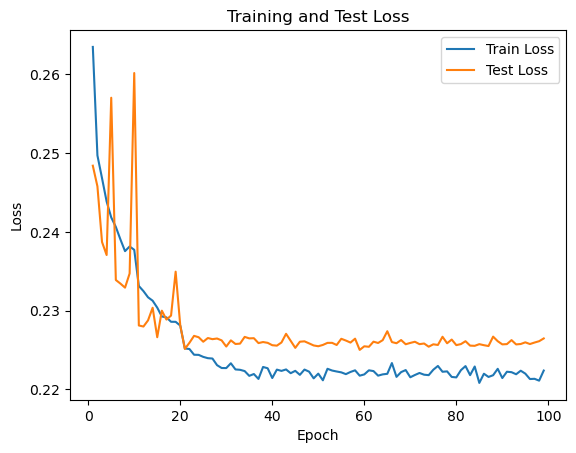

In [13]:
plot_losses(results)